In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df=pd.read_excel('AdidasSalesdata.xlsx')
display(df.head(5))

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet


In [50]:
print("Columns:")
display(df.columns)
print("(Rows,columns)")
display(df.shape)

Columns:


Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Gender Type', 'Product Category', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

(Rows,columns)


(9648, 14)

In [51]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119552,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [52]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

None

In [53]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Gender Type         0
Product Category    0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [54]:
print("Check duplicated rows Dataframe:")
df.duplicated().sum()

Check duplicated rows Dataframe:


np.int64(0)

In [55]:
df['State_City'] = df['State'] + ', ' + df['City']+', '+df['Region']
df.drop(['City','State'], axis=1, inplace=True)
df.drop(['Retailer ID'],axis=1,inplace=True)
df.drop(['Region'],axis=1,inplace=True)
display(df.head(5))

,Retailer,Invoice Date,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State_City
0,Foot Locker,2021-10-26,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet,"Pennsylvania, Philadelphia, Northeast"
1,Foot Locker,2021-10-27,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet,"Pennsylvania, Philadelphia, Northeast"
2,Foot Locker,2021-10-28,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet,"Pennsylvania, Philadelphia, Northeast"
3,Foot Locker,2021-10-29,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet,"Pennsylvania, Philadelphia, Northeast"
4,Foot Locker,2021-10-30,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet,"Pennsylvania, Philadelphia, Northeast"


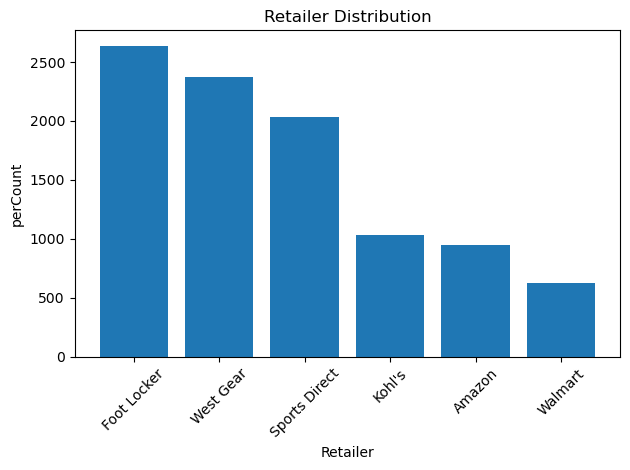

In [56]:
plt.bar(df['Retailer'].value_counts().index,df['Retailer'].value_counts().values)
plt.xlabel('Retailer')
plt.ylabel('perCount')
plt.title('Retailer Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: Total Sales, dtype: float64

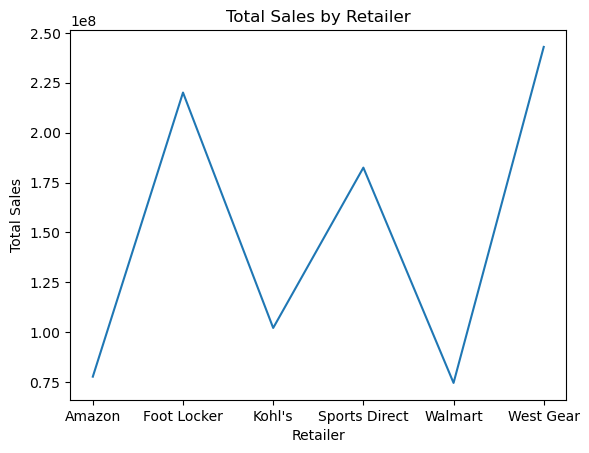

In [57]:
display(df.groupby('Retailer')['Total Sales'].sum())
df.groupby('Retailer')['Total Sales'].sum().plot()
plt.title('Total Sales by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.show()

Retailer
Amazon           28818503.31
Foot Locker      80722124.81
Kohl's           36811252.58
Sports Direct    74332954.96
Walmart          25782052.61
West Gear        85667873.18
Name: Operating Profit, dtype: float64

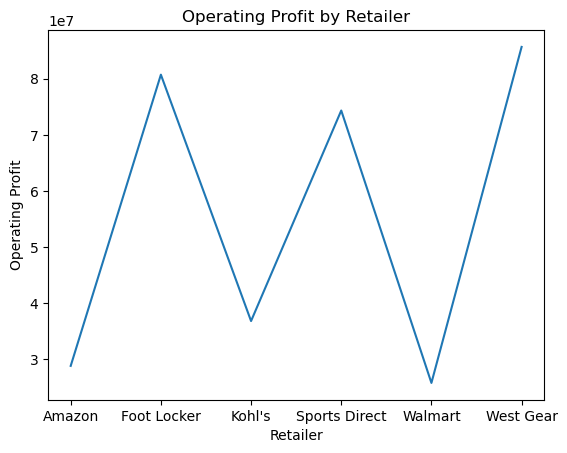

In [58]:
display(df.groupby('Retailer')['Operating Profit'].sum())
df.groupby('Retailer')['Operating Profit'].sum().plot()
plt.title('Operating Profit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Operating Profit')
plt.show()

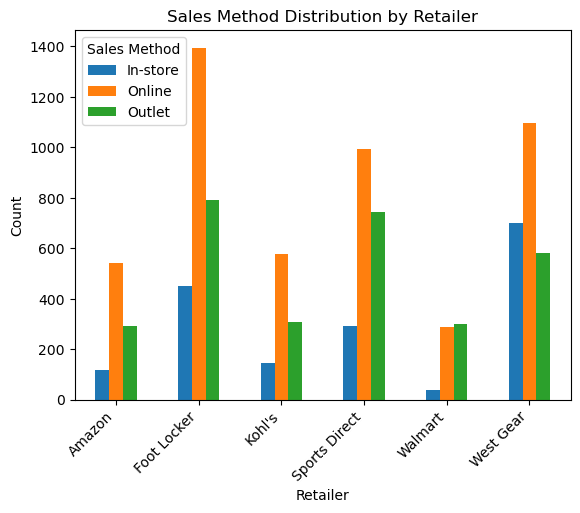

In [59]:
df.groupby('Retailer')['Sales Method'].value_counts().unstack().plot(kind='bar')
plt.title('Sales Method Distribution by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [60]:
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Day'] = df['Invoice Date'].dt.day
df.drop(['Invoice Date'], axis=1, inplace=True)
display(df.head())

,Retailer,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State_City,Year,Month,Day
0,Foot Locker,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet,"Pennsylvania, Philadelphia, Northeast",2021,10,26
1,Foot Locker,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet,"Pennsylvania, Philadelphia, Northeast",2021,10,27
2,Foot Locker,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet,"Pennsylvania, Philadelphia, Northeast",2021,10,28
3,Foot Locker,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet,"Pennsylvania, Philadelphia, Northeast",2021,10,29
4,Foot Locker,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet,"Pennsylvania, Philadelphia, Northeast",2021,10,30


,Month,Retailer,Total Sales
0,1,Amazon,3913616.0
1,1,Foot Locker,20559526.0
2,1,Kohl's,9352035.0
3,1,Sports Direct,7259584.0
4,1,West Gear,30394381.0


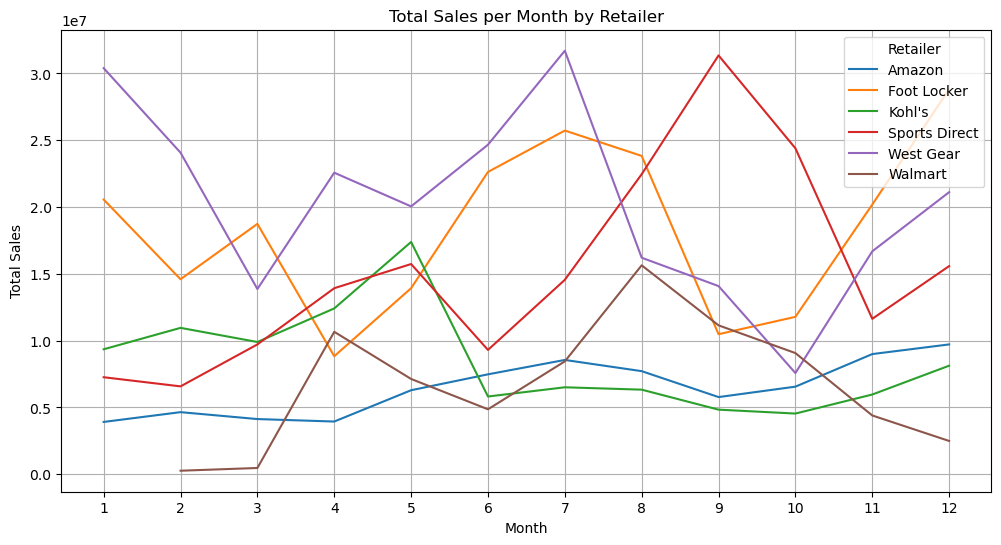

In [61]:
monthly_sales = df.groupby(['Month', 'Retailer'])['Total Sales'].sum().reset_index()
display(monthly_sales.head())
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Sales', hue='Retailer')
plt.title('Total Sales per Month by Retailer')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

,Month,Retailer,Total Sales
0,1,Amazon,3913616.0
1,1,Foot Locker,20559526.0
2,1,Kohl's,9352035.0
3,1,Sports Direct,7259584.0
4,1,West Gear,30394381.0


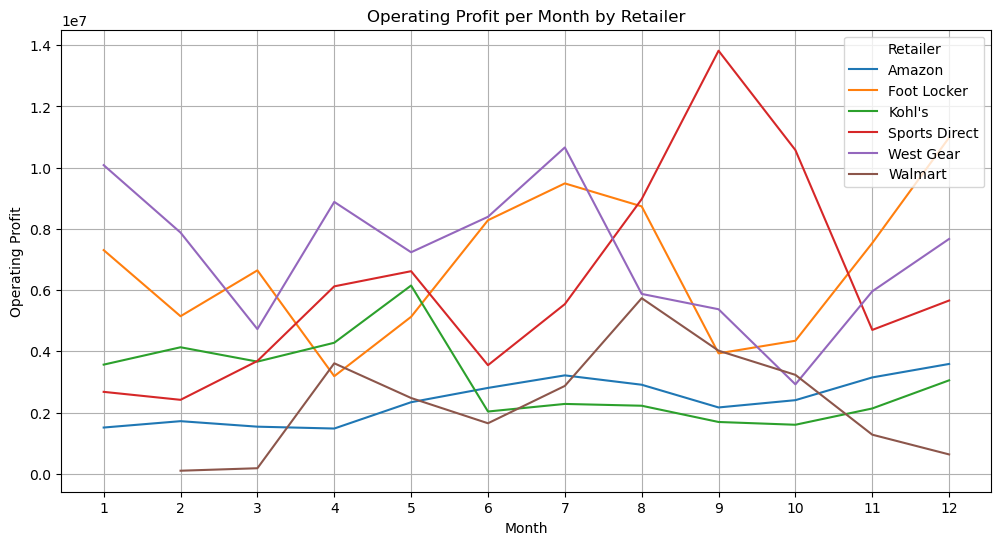

In [62]:
monthly_profit = df.groupby(['Month', 'Retailer'])['Operating Profit'].sum().reset_index()
display(monthly_sales.head())
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_profit, x='Month', y='Operating Profit', hue='Retailer')
plt.title('Operating Profit per Month by Retailer')
plt.xlabel('Month')
plt.ylabel('Operating Profit')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

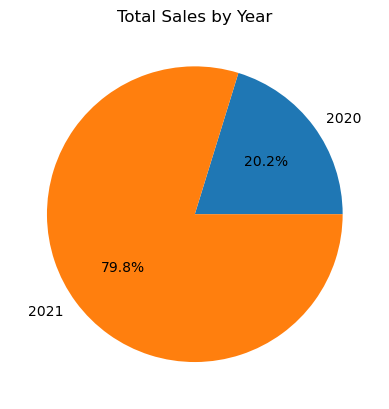

In [63]:
yearly_sales = df.groupby('Year')['Total Sales'].sum()
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%')
plt.title('Total Sales by Year')
plt.show()

Gender Type
Men      4826
Women    4822
Name: count, dtype: int64

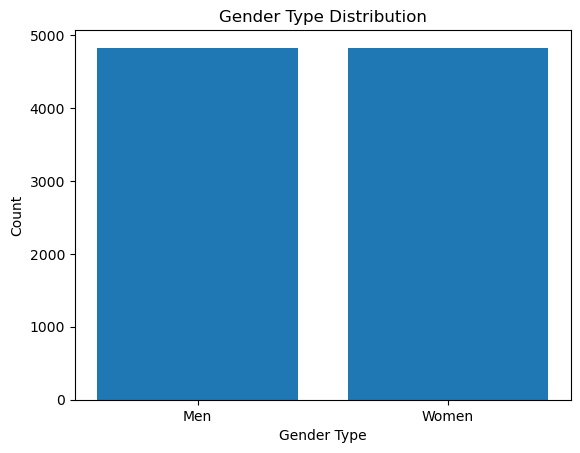

In [64]:
display(df['Gender Type'].value_counts())
plt.bar(df['Gender Type'].value_counts().index, df['Gender Type'].value_counts().values)
plt.xlabel('Gender Type')
plt.ylabel('Count')
plt.title('Gender Type Distribution')
plt.show()

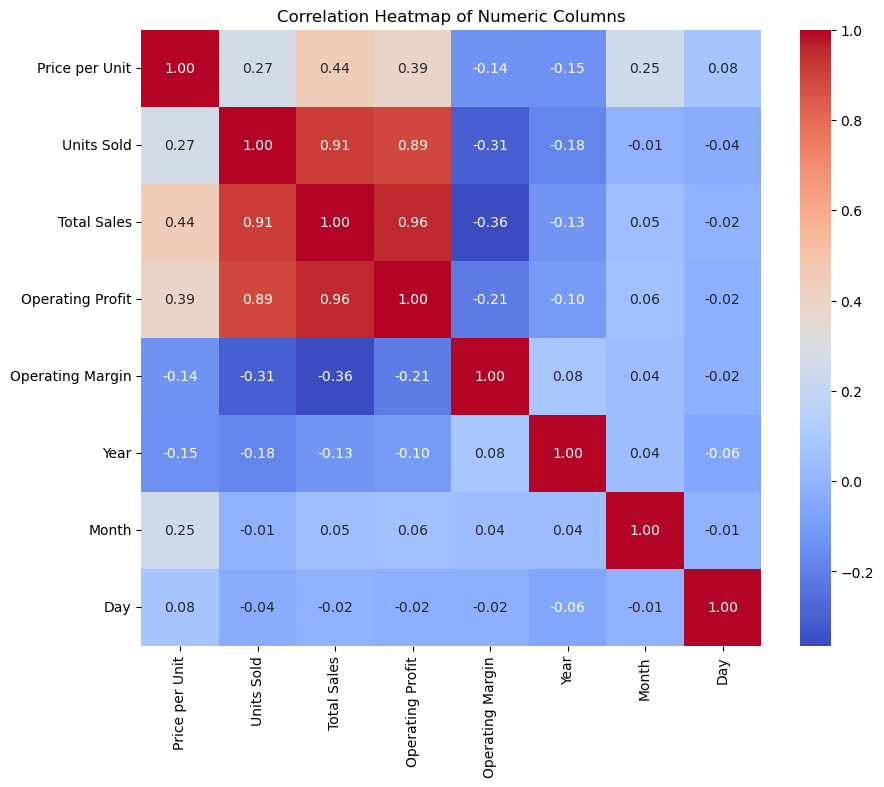

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

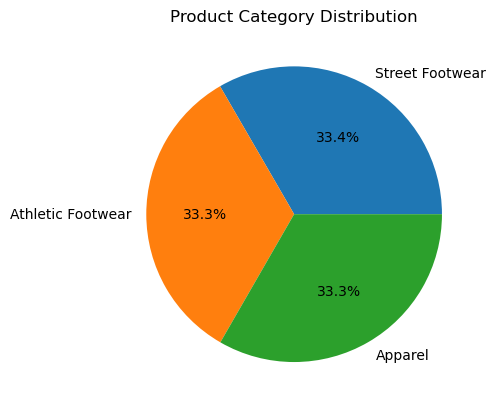

In [66]:
plt.pie(df['Product Category'].value_counts(), labels=df['Product Category'].value_counts().index, autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.show()

Gender Type              Men                                         Women  \
Product Category     Apparel Athletic Footwear Street Footwear     Apparel   
Retailer                                                                     
Amazon            10474770.0        12011959.0      22161652.0  15710639.0   
Foot Locker       29508995.0        36480415.0      57481575.0  43296114.0   
Kohl's            14164965.0        17885316.0      22421073.0  20315239.0   
Sports Direct     24825286.0        30889734.0      38672270.0  37113257.0   
Walmart           11490680.0        13600404.0      14924255.0  15316099.0   

Gender Type                                         
Product Category Athletic Footwear Street Footwear  
Retailer                                            
Amazon                   7935255.0       9404637.0  
Foot Locker             24239624.0      29087997.0  
Kohl's                  12493869.0      14834291.0  
Sports Direct           23145288.0      27825162.0  
Walmart                  8762792.0      10464180.0

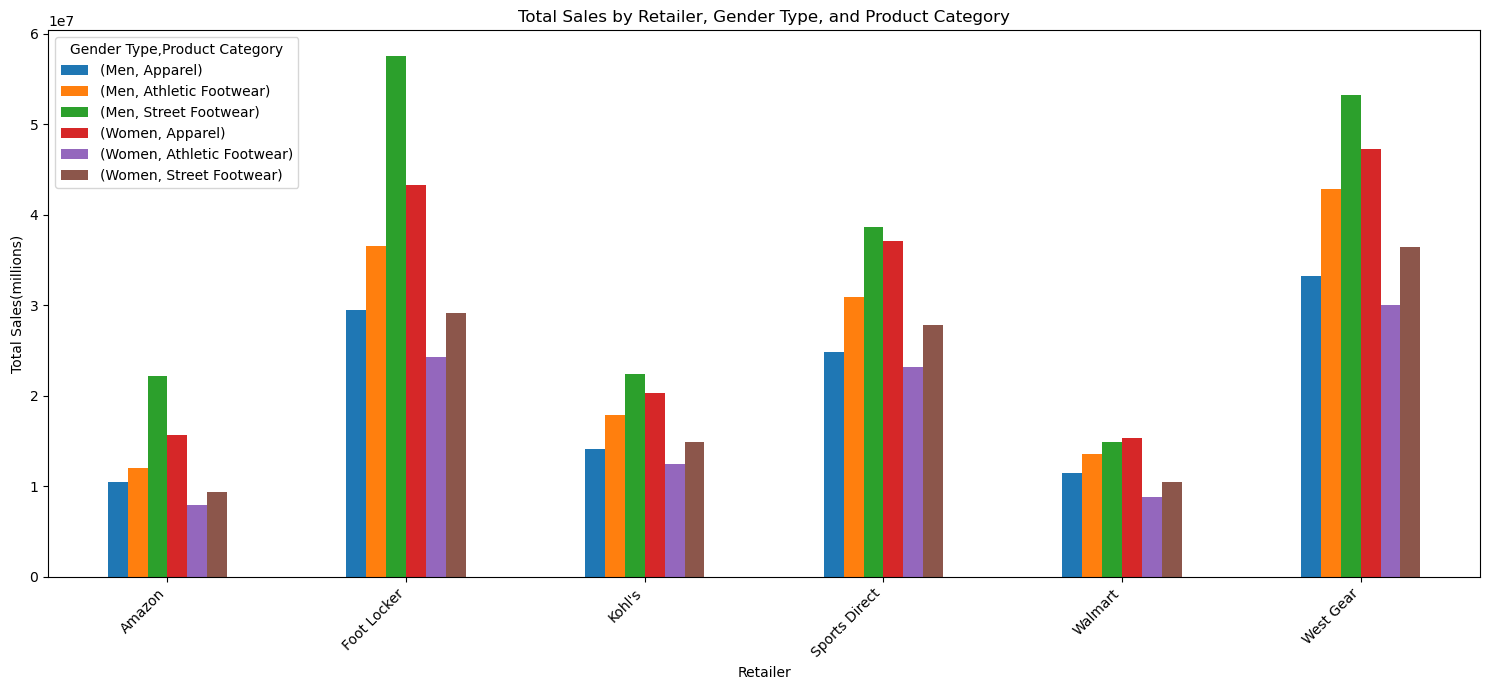

In [67]:
grouped_sales = df.groupby(['Retailer','Gender Type','Product Category'])['Total Sales'].sum().reset_index()
sales_pivot = grouped_sales.pivot_table(index='Retailer', columns=['Gender Type', 'Product Category'], values='Total Sales')
display(sales_pivot.head())
sales_pivot.plot(kind='bar', figsize=(15, 7))
plt.title('Total Sales by Retailer, Gender Type, and Product Category')
plt.xlabel('Retailer')
plt.ylabel('Total Sales(millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

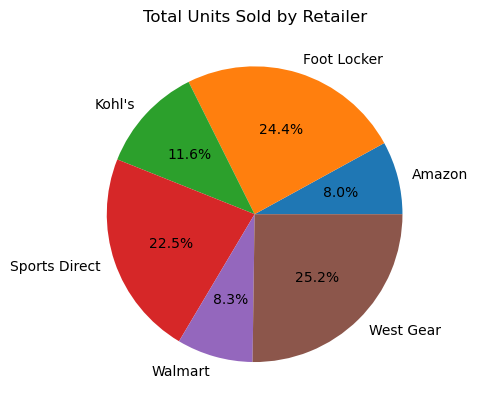

In [68]:
retailer_units_sold = df.groupby('Retailer')['Units Sold'].sum()
plt.pie(retailer_units_sold, labels=retailer_units_sold.index, autopct='%1.1f%%')
plt.title('Total Units Sold by Retailer')
plt.show()

Gender Type           Men                                       Women  \
Product Category  Apparel Athletic Footwear Street Footwear   Apparel   
Retailer                                                                
Amazon            24062.0           31987.0         54883.0   35885.0   
Foot Locker       71543.0          103767.0        159081.0  104489.0   
Kohl's            36080.0           51012.0         66844.0   49012.0   
Sports Direct     67160.0          100203.0        124879.0   99390.0   
Walmart           30506.0           37157.0         41980.0   38002.0   

Gender Type                                         
Product Category Athletic Footwear Street Footwear  
Retailer                                            
Amazon                     22544.0         28629.0  
Foot Locker                73104.0         92385.0  
Kohl's                     38517.0         45910.0  
Sports Direct              73697.0         92311.0  
Walmart                    26835.0         31745.0

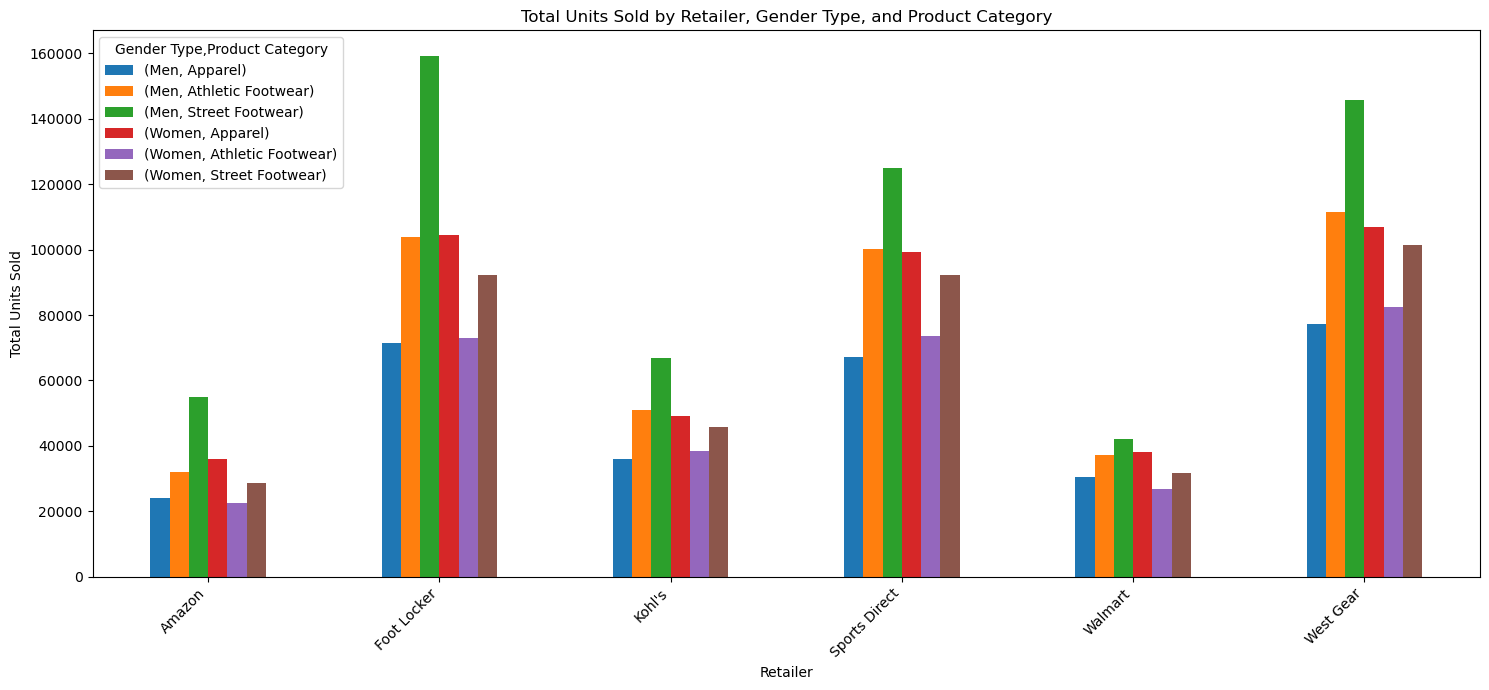

In [69]:
grouped_sales=df.groupby(['Retailer','Gender Type','Product Category'])['Units Sold'].sum().reset_index()
sales_pivot = grouped_sales.pivot_table(index='Retailer', columns=['Gender Type', 'Product Category'], values='Units Sold')
display(sales_pivot.head())
ax = sales_pivot.plot(kind='bar', figsize=(15, 7))
plt.title('Total Units Sold by Retailer, Gender Type, and Product Category')
plt.xlabel('Retailer')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()